<a href="https://colab.research.google.com/github/divyall/Data-Cleaning-and-Preprocessing-task1L1/blob/main/Task1_L3_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import files
print(" 3) Sentiment dataset.csv)")
uploaded = files.upload()

# Read into pandas dataframe
data = pd.read_csv("3) Sentiment dataset.csv")
print("\n Dataset Loaded Successfully!")
print("Shape of data:", data.shape)
print("\nSample rows:")
display(data.head())


 3) Sentiment dataset.csv)


Saving 3) Sentiment dataset.csv to 3) Sentiment dataset (1).csv

✅ Dataset Loaded Successfully!
Shape of data: (732, 15)

Sample rows:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
#  Data Preprocessing
# Assuming last column is the target variable (label)
target = data.columns[-1]

X = data.drop(columns=[target])
y = data[target]

# Encode labels if categorical
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Convert categorical features into numeric form
X = pd.get_dummies(X, drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
#  Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n🔹 Training set size:", X_train.shape)
print("🔹 Testing set size:", X_test.shape)


🔹 Training set size: (585, 3170)
🔹 Testing set size: (147, 3170)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


📊 Logistic Regression Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       1.00      0.33      0.50         3
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         5
          14       0.12      1.00      0.21        15
          15       1.00      0.13      0.24        15
          16       0.50      0.25      0.33         8
          17       0.00      0.00      0.00        10
          18       1.00      0.12      0.21        17
          19       0.40      0.20      0.27        10
          20       1.00      0.14      0.25        14
          21       0.00      0.00      0.00      

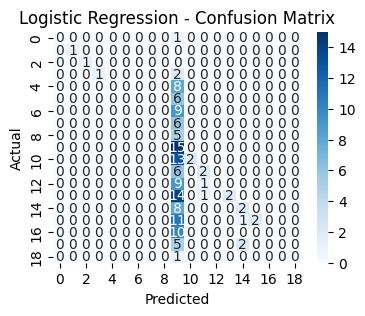

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


📊 Decision Tree Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         3
           9       1.00      0.25      0.40         8
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         9
          12       0.40      0.33      0.36         6
          13       0.00      0.00      0.00         5
          14       0.17      0.27      0.21        15
          15       0.33      0.20      0.25        15
          16       0.25      0.50      0.33         8
          17       0.00      0.00      0.00        10
          18       0.29      0.47      0.36        17
          19       0.14      0.20      0.17        10
          20       0.29      0.14      0.19        14
 

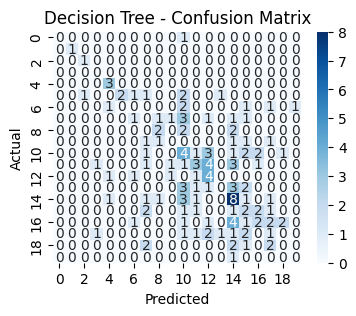

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


📊 Random Forest Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       0.50      0.67      0.57         3
           9       0.40      0.25      0.31         8
          10       0.00      0.00      0.00         6
          11       0.33      0.22      0.27         9
          12       0.50      0.33      0.40         6
          13       0.00      0.00      0.00         5
          14       0.14      0.53      0.23        15
          15       0.75      0.20      0.32        15
          16       0.17      0.25      0.20         8
          17       0.00      0.00      0.00        10
          18       0.25      0.12      0.16        17
          19       0.23      0.50      0.31        10
          20       0.42      0.36      0.38        14
 

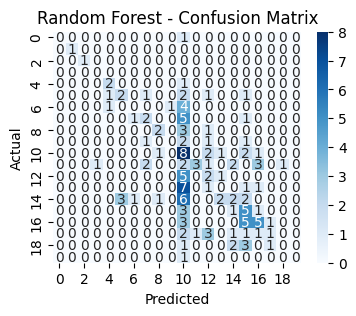

In [8]:
# Train & Evaluate Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

performance_summary = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, average='weighted')
    rec = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    performance_summary[model_name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}

    print(f"\n📊 {model_name} Report:\n")
    print(classification_report(y_test, predictions))

    # Confusion matrix heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [10]:
# Compare Model Performance
perf_df = pd.DataFrame(performance_summary).T
print("\n Model Comparison Table:")
display(perf_df)


 Model Comparison Table:


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.190476,0.413226,0.190476,0.153515
Decision Tree,0.224490,0.233312,0.224490,0.203894
Random Forest,0.244898,0.293303,0.244898,0.227626


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



 Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

 Final Tuned Random Forest Report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           8       0.67      0.67      0.67         3
           9       0.50      0.25      0.33         8
          10       0.00      0.00      0.00         6
          11       0.25      0.11      0.15         9
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         5
          14       0.13      0.60      0.22        15
          15       0.60      0.20      0.30        15
          16       0.22      0.25      0.24         8
          17       0.50      0.10      0.17        10
          18       0.25      0.18      0.21        17
          19       0.17      0.50      0.26       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


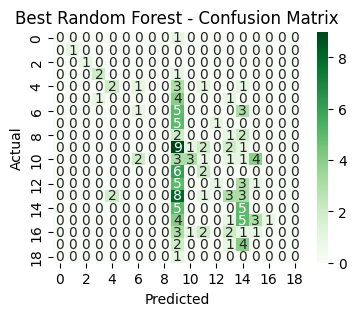

In [11]:
# Hyperparameter Tuning (Random Forest)
param_options = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_options,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\n Best Parameters for Random Forest:", grid_search.best_params_)

# Train best model
best_rf = grid_search.best_estimator_
best_preds = best_rf.predict(X_test)

print("\n Final Tuned Random Forest Report:\n")
print(classification_report(y_test, best_preds))

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, fmt="d", cmap="Greens")
plt.title("Best Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()